In [15]:
import numpy as np
from scipy import signal
samples = np.load('log_startct.npy')
iq_fc32 = samples.astype(np.complex64)
with open('samples.fc32', 'wb') as f: 
    f.write(iq_fc32.tobytes())

In [34]:
print(samples.dtype)
print(len(samples))
print(iq_fc32.dtype)
print(len(iq_fc32))
print(samples[0])
print(iq_fc32[0])



complex128
6000000
complex64
6000000
(0.19215686274509802+0.33333333333333326j)
(0.19215687+0.33333334j)


In [35]:
print(np.max(iq_fc32))

(1+0.78039217j)


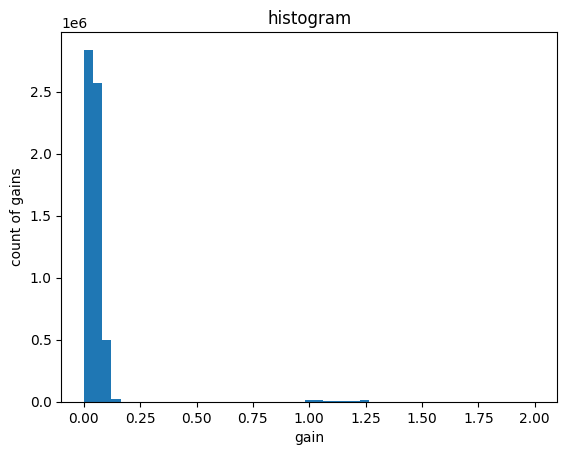

In [36]:
from matplotlib import pyplot as plt
hist_bins = np.linspace(start=0, stop=2, num=50)
plt.hist(np.abs(samples), bins = hist_bins) 
plt.title("histogram") 
plt.xlabel("gain")
plt.ylabel("count of gains")
plt.show()

In [37]:
print(np.abs(1+1j))

1.4142135623730951


In [50]:
print(np.max(np.abs(samples)))


1.3922065718824816


In [198]:
import numpy as np
import scipy
from pylab import * 
from scipy import signal
from matplotlib import pyplot as plt

sample_rate = 1.024e6
center_freq: float = 160270968
freq_offset: float = -43.6792e4 #Hz
t = np.linspace(0, 6e6/1.024e6, 5)
print(t)

def signaltonoise_dB(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return 20*np.log10(abs(np.where(sd == 0, 0, m/sd)))

def bandpower(x, fs, fmin, fmax):
    f, Pxx = scipy.signal.periodogram(x, fs=fs)
    ind_min = np.argmax(f > fmin) - 1
    ind_max = np.argmax(f > fmax) - 1
    return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])

samples = np.load('log_v13.npy')
samples = samples.astype(np.complex64)

t = np.arange(len(samples))/sample_rate
samples = samples * np.exp(2j*np.pi*t*freq_offset)
h = signal.firwin(501, 0.02, pass_zero=True)
samples = np.convolve(samples, h, 'valid')
samples = samples[::100]
sample_rate = sample_rate/100
samples = np.abs(samples)
samples = np.convolve(samples, [1]*10, 'valid')/10

#psd(samples, NFFT=1024, Fs=10240, Fc=160.708e6)
#xlabel('Freq (Mhz)')
#ylabel('Rel pwr (dB)')
#show()
#lines = np.linspace(0, 61440, 13)
#for l in lines:
#    plt.axvline(x=l)
#plt.plot(samples)
#spectrum = np.fft.fft(samples)
#plt.plot(spectrum)

#for ix in range (0, samples.size, 5120):
#    samples_ = samples[ix:ix+5120]
    #print(f"signal to noise :  {signaltonoise_dB(samples_)}")



[0.         1.46484375 2.9296875  4.39453125 5.859375  ]


In [4]:
from rtlsdr import RtlSdr

sdr = RtlSdr()
sdr.set_bias_tee(True)










0

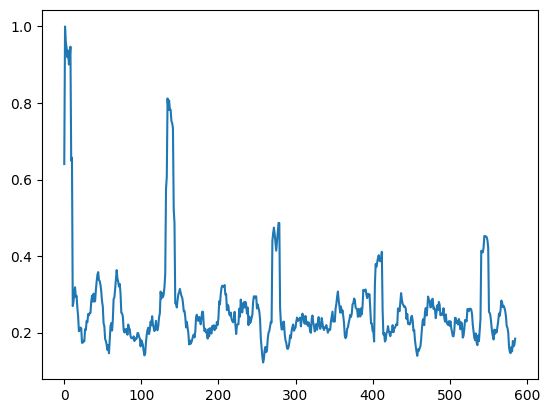

In [144]:
t = np.arange(len(samples))/sample_rate
samples = samples * np.exp(2j*np.pi*t*freq_offset)
h = signal.firwin(501, 0.02, pass_zero=True)
samples = np.convolve(samples, h, 'valid')
samples = samples[::100]
sample_rate = sample_rate/100
samples = np.abs(samples)
samples = np.convolve(samples, [1]*10, 'valid')/10
max_samp = np.max(samples)
samples /= np.max(samples)
plt.plot(samples)




In [58]:
low_samples = samples < threshold
high_samples = samples >= threshold

        # Compute the rising edge and falling edges by comparing the current value to the next with
        # the boolean operator & (if both are true the result is true) and converting this to an index
        # into the current array
rising_edge_idx = np.nonzero(low_samples[:-1] & np.roll(high_samples, -1)[:-1])[0]
falling_edge_idx = np.nonzero(high_samples[:-1] & np.roll(low_samples, -1)[:-1])[0]



In [83]:
rising_edge_idx
(rising_edge_idx[31] - rising_edge_idx[30]) / sample_rate





1.104677481284702
